In [37]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences
from scipy.ndimage import gaussian_filter1d
from scipy.stats import landau

FADC_BIN_WIDTH = 1

In [38]:
input_file = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_40cm_TRACE_2ns.trace'
#input_file = '/Users/workspace/Software/Pierre_Tank/New_Geometry/output/top_50cm.trace'

nslot_trace = 150 
time_slot = 2 # ns 
time_bins = np.linspace(time_slot/2.,time_slot*nslot_trace + time_slot/2., nslot_trace)

num_pmt = 1

pmt_1_cols = np.arange(nslot_trace*(num_pmt-1),nslot_trace*(num_pmt))

num_pmt = 4
pmt_4_cols = np.arange(nslot_trace*(num_pmt-1),nslot_trace*(num_pmt))

top_pmt_1 = np.loadtxt(input_file, usecols=pmt_1_cols)
top_pmt_4 = np.loadtxt(input_file, usecols=pmt_4_cols)



In [39]:
## If you want to remove zeros from the mean computation

#top_pmt_1
#top_pmt_1[top_pmt_1 == 0] = np.nan
#top_pmt_1_mean = np.nanmean(top_pmt_1, axis=0)


In [40]:
top_pmt_1

top_pmt_1_mean = np.mean(top_pmt_1, axis=0)
top_pmt_4_mean = np.mean(top_pmt_4, axis=0)

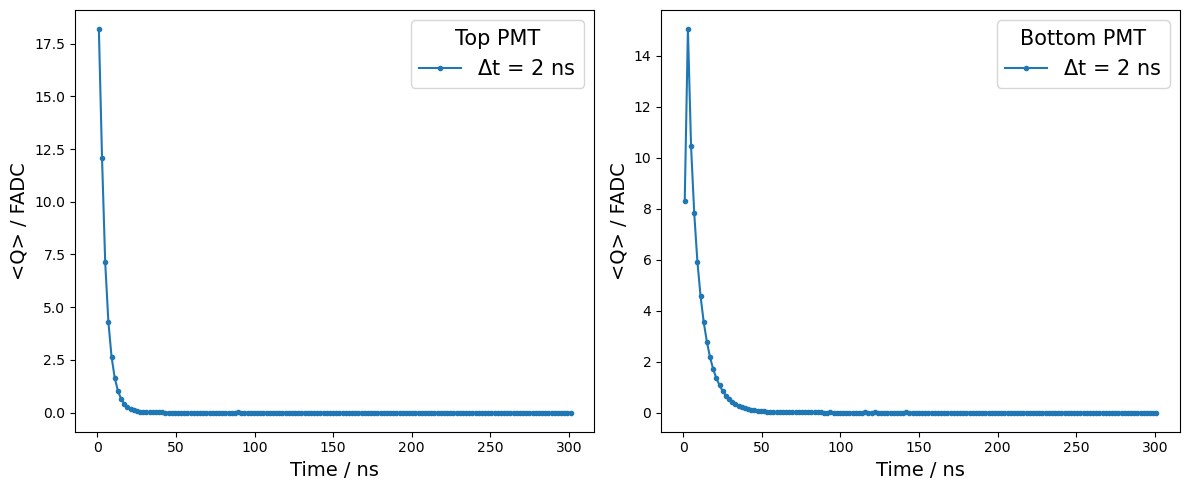

In [41]:
plt.subplots(1,2,figsize=(12,5))

legend_string = r'$\Delta $t = '+str(time_slot)+' ns'

plt.subplot(1,2,1)
plt.plot(time_bins,top_pmt_1_mean, marker='.', label=legend_string)
plt.xlabel('Time / ns', size=14)
plt.ylabel('<Q> / FADC', size=14)
plt.legend(title='Top PMT',title_fontsize=15,prop={'size': 15 })
#plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(time_bins,top_pmt_4_mean, marker='.', label=legend_string)
plt.xlabel('Time / ns', size=14)
plt.ylabel('<Q> / FADC', size=14)
plt.legend(title='Bottom PMT',title_fontsize=15, prop={'size': 15 })
#plt.yscale('log')

plt.tight_layout()

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/pmt_trace/trace_top_bottom_PMT_40cm_r_180cm_2ns.pdf')
#plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/pmt_trace/trace_top_bottom_PMT_50cm_r_150cm.pdf')

            


Time scale of the exponential fit : 4.566990072495267  +- 0.03242324264437562  ns
$\tau$ = 4.57 +- 0.03 ns
$\tau$ = 8.66 +- 0.03 ns


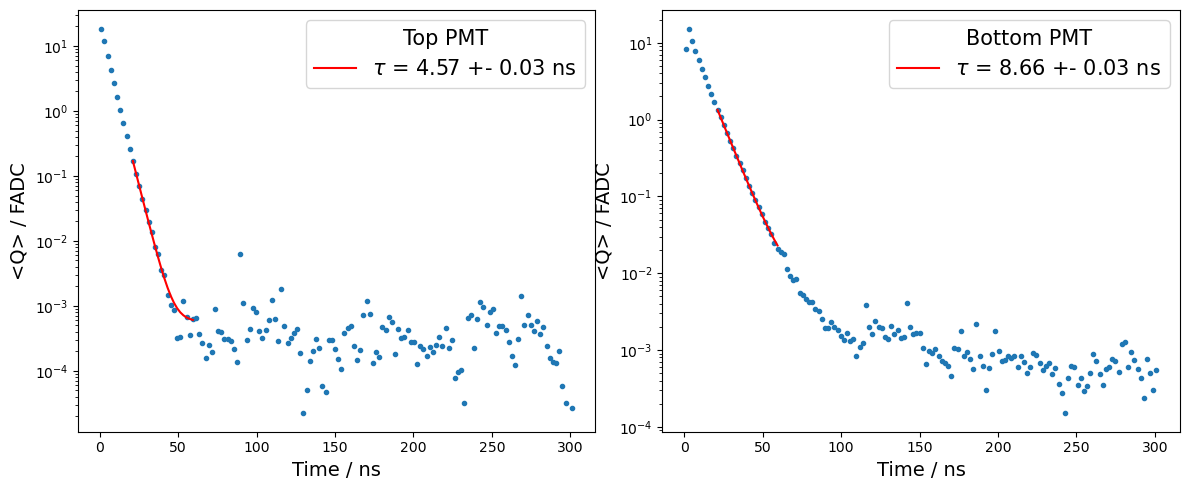

In [42]:
plt.subplots(1,2,figsize=(12,5))

def exp(x, m, t, b):
    return m * np.exp(-x/t) + b

p0 = [1,20,0]

fit_range_low = 10
fit_range_high = 30

popt, pcov = curve_fit(exp, time_bins[fit_range_low:fit_range_high], top_pmt_1_mean[fit_range_low:fit_range_high], p0=p0)
popt_pmt4, pcov_pmt4 = curve_fit(exp, time_bins[fit_range_low:fit_range_high], top_pmt_4_mean[fit_range_low:fit_range_high], p0=p0)

m,t,b = popt
perr = np.sqrt(np.diag(pcov))
dm,dt,db = perr

m_4,t_4,b_4 = popt_pmt4
perr_4 = np.sqrt(np.diag(pcov_pmt4))
dm_4,dt_4,db_4 = perr_4

plt.subplot(1,2,1)
print('Time scale of the exponential fit :',t,' +-',dt,' ns')
str_fit = r'$\tau$ = {:.2f}'.format(t)+' +- {:.2f} ns'.format(dt)
print(str_fit)
plt.plot(time_bins[fit_range_low:fit_range_high],exp(time_bins[fit_range_low:fit_range_high],m,t,b),color='red',label=str_fit)
plt.scatter(time_bins,top_pmt_1_mean, marker='.')
plt.xlabel('Time / ns', size=14)
plt.ylabel('<Q> / FADC', size=14)
plt.legend(title='Top PMT',title_fontsize=15,prop={'size': 15 })
plt.yscale('log')

plt.subplot(1,2,2)
str_fit = r'$\tau$ = {:.2f}'.format(t_4)+' +- {:.2f} ns'.format(dt_4)
print(str_fit)
plt.scatter(time_bins,top_pmt_4_mean, marker='.')
#plt.plot(time_bins,top_pmt_4_mean)
plt.plot(time_bins[fit_range_low:fit_range_high],exp(time_bins[fit_range_low:fit_range_high],m_4,t_4,b_4),color='red',label=str_fit)

plt.xlabel('Time / ns', size=14)
plt.ylabel('<Q> / FADC', size=14)

plt.legend(title='Bottom PMT',title_fontsize=15,prop={'size': 15 })

plt.tight_layout()
plt.yscale('log')

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/pmt_trace/fit_top_bottom_PMT_40cm_r_180cm_2ns.pdf')
#plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/pmt_trace/fit_top_bottom_PMT_50cm_r_150cm.pdf')
